In [1]:
import string

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('vader_lexicon')



from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer


from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('data/cleaned_data.csv', index_col=0)

In [3]:
df.describe()

,floor,ground-floor,1-floor,2-floor,3-floor,emotion,comfort,occupation,usage,recruitment
count,113,28,51,13,13,100,96,97,101,100
unique,5,6,6,3,4,90,89,2,2,2
top,1st Floor,Round tables by the three plants (across woode...,Yellow/white chairs & tables (besides the wood...,Library learning room,Open lounge area,Neutral,Very comfortable,Yes,Yes,I will be only be participating in the survey
freq,52,11,12,9,5,4,4,87,85,76


# Students Across the Floors

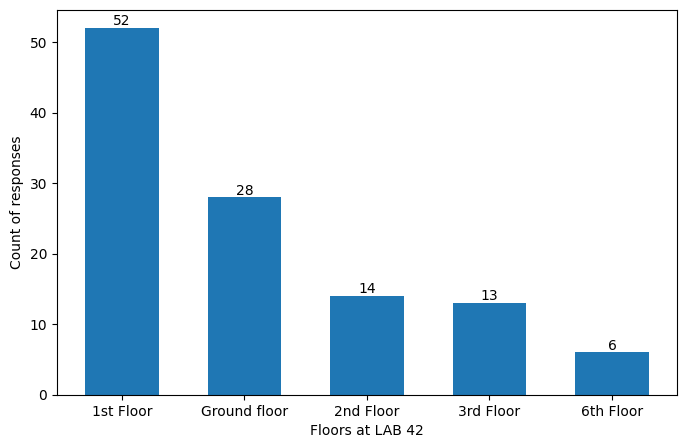

In [4]:
fig, ax = plt.subplots()
data = df.floor.value_counts()
data = pd.DataFrame(data).reset_index().rename(columns={"index": "Floor", "floor": "Count of Responses"})
width = 0.6


p=ax.bar(data.Floor, data["Count of Responses"], width)
ax.bar_label(p, label_type='edge')
plt.ylabel("Count of responses")
plt.xlabel("Floors at LAB 42")
fig.set_size_inches(8, 5)
plt.savefig('plots/floors-responses.jpg', dpi=300, bbox_inches="tight")

In [5]:
floor_df = df[['floor', 'ground-floor', '1-floor', '2-floor', '3-floor' ]]
ground_floor = floor_df[floor_df['floor'] == 'Ground floor'].iloc[:, 0:2].value_counts()
first_floor = floor_df[floor_df['floor'] == '1st Floor'].loc[:, ['floor', '1-floor']].value_counts()
second_floor = floor_df[floor_df['floor'] == '2nd Floor'].loc[:, ['floor', '2-floor']].value_counts()
third_floor = floor_df[floor_df['floor'] == '3rd Floor'].loc[:, ['floor', '3-floor']].value_counts()

In [6]:
df[df['floor'] == '6th Floor']

,floor,ground-floor,1-floor,2-floor,3-floor,emotion,comfort,occupation,usage,recruitment
4,6th Floor,NaN,NaN,NaN,NaN,"Hungry, a bit cold","Cold, quiet, well lit",NaN,Yes,I would like to participate in a building walk
18,6th Floor,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,I would like to participate in a building walk
37,6th Floor,NaN,NaN,NaN,NaN,"Tired, busy",Noisy (poor sound insulation between rooms),No,Yes,I will be only be participating in the survey
38,6th Floor,NaN,NaN,NaN,NaN,Peaceful,Default brightness is a little bright,Yes,Yes,I would like to participate in a building walk
41,6th Floor,NaN,NaN,NaN,NaN,Ok,Ok,Yes,Yes,I will be only be participating in the survey
75,6th Floor,NaN,NaN,NaN,NaN,"Convenient, and calm sometime",I am quite comfortable with the overall enviro...,No,Yes,I will be only be participating in the survey


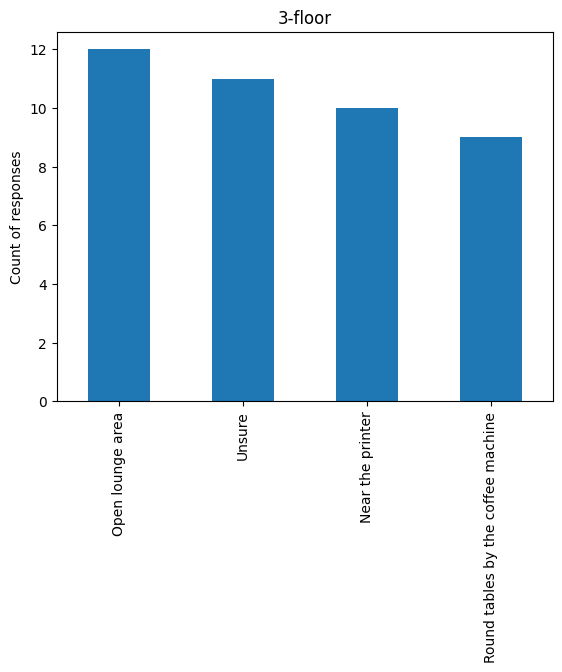

In [7]:
def plot_responses_rooms(floor):
    # ax = plt.subplot(2, 2, n + 1)
    df[floor].value_counts().plot.bar()
    plt.ylabel("Count of responses")
    plt.title(floor.capitalize())

# plt.figure(figsize=(15, 12))
# plt.subplots_adjust(hspace=3)
floors = ['ground-floor', '1-floor', '2-floor', '3-floor']

for floor in floors:
    plot_responses_rooms(floor)

plt.savefig('plots/spaces-per-floor.jpg',
            dpi=300, bbox_inches='tight')

# Emotions

In [8]:
df_emo = df.emotion.dropna()

df_emo = df_emo.apply(lambda x: x.replace('’', ''))

### Tokenise

In [9]:
df_emo

1      I always feel a bit zen when I am here. Its qu...
2                                       Cold, a bit down
3                                                   Calm
4                                     Hungry, a bit cold
5      Stressed about my exams but I am happy in this...
                             ...                        
118                       Focused, happy and productive.
119                                                Chill
120                              Calm and in a good mood
121                           Good concentration. Happy.
122                          Safe, open, calm, relaxed. 
Name: emotion, Length: 100, dtype: object

In [10]:
import string

def apply_token(row):
    stop_words = set(stopwords.words("english"))
    words_in_sent = word_tokenize(row)

    filtered_list = []
    
    for word in words_in_sent:
        if word.casefold() not in stop_words:
            filtered_list.append(word)
    
    return filtered_list

In [11]:
df_emo = df_emo.apply(apply_token)

In [12]:
def cleanup(df_emo):
    combo_emo = []
    for row in df_emo:
        combo_emo.append(row)
    
    combo_emo = list(np.concatenate(combo_emo).flat)
    combo_emo = list(filter(lambda token: token not in string.punctuation,
                            combo_emo))
    combo_emo = [x.lower() for x in combo_emo]
    
    return combo_emo

In [13]:
combo_emo_list = cleanup(df_emo)

In [14]:
frequency_distribution = FreqDist(combo_emo_list)
frequency_distribution.most_common(20)

[('calm', 24),
 ('relaxed', 12),
 ('like', 10),
 ('feel', 8),
 ('happy', 8),
 ('tired', 7),
 ('good', 7),
 ('bit', 6),
 ('neutral', 6),
 ('peaceful', 5),
 ('study', 5),
 ('focused', 5),
 ('nice', 5),
 ('makes', 5),
 ('atmosphere', 5),
 ('quiet', 4),
 ('cold', 4),
 ('motivated', 4),
 ('open', 4),
 ('comfortable', 4)]

In [15]:
def frequency_distribution(lst, label):
    top_30 = FreqDist(lst).most_common(20)
    frequency_distribution = pd.Series(dict(top_30))

    sns.set_theme(style="ticks")
    sns.barplot(y=frequency_distribution.index,
                x=frequency_distribution.values,
                palette = 'hls',
                saturation = 8)
    plt.xlabel("Count of responses")
    plt.ylabel("Most frequently occuring responses")
    plt.gcf().set_size_inches(5,7)
    # plt.xlim(0,20)

    plt.savefig('plots/' + label + '-freq-dist.jpg',
            dpi=300, bbox_inches='tight')

# frequency_distribution(combo_emo_list, 'emo')

calm (19), bit (6), nice (5), feel (4), quiet (4), neutral (4), relaxed (4), focused (4), noisy (3), cold (3), stressed (3), happy (3), motivated (3), peaceful (3), tired (3), good (3), study (3), building (3)

Interesting to note that words associated with emotion questions also included some words about comfort such as `cold` and `noisy`. Overall, we see that words associated with emotions are a mix of emotions, moods, sentiments, that are also typically associated with learning (`stressed`, `focused`, `motivated`)

### Lemmatisation

In [16]:
def lemmatiser(labels):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in labels]
    return lemmatized_words

def check_collocations(lst):
    return nltk.Text(lst).collocations()
    
def find_collocations(df_emo):
    lem_emo = df_emo.apply(lemmatiser)
    combined_emos = list(np.concatenate(lem_emo.to_list()).flat)
    return check_collocations(combined_emos)

In [17]:
find_collocations(df_emo)

feel like; natural light; study Calm; feel bit; calm Calm


study calm were the most frequently occuring pair of words (collocations) in the list of emotions.

# Comfort

In [18]:
df_comfort = df.comfort.dropna()
df_comfort = df_comfort.apply(lambda x: x.replace('’', ''))

### Tokenise

In [19]:
df_comfort = df_comfort.apply(apply_token)
combo_comfort_list = cleanup(df_comfort)

In [20]:
combo_comfort_list = [word for word in combo_comfort_list if word != "'s"]

In [21]:
frequency_distribution = FreqDist(combo_comfort_list)
frequency_distribution.most_common(20)

[('comfortable', 40),
 ('light', 23),
 ('good', 20),
 ('temperature', 17),
 ('noise', 17),
 ('cold', 15),
 ('bit', 15),
 ('air', 13),
 ('nice', 11),
 ('pretty', 11),
 ('like', 10),
 ('noisy', 10),
 ('little', 10),
 ('quality', 9),
 ('feel', 9),
 ('room', 8),
 ('lot', 7),
 ('space', 6),
 ('right', 6),
 ('window', 6)]

In [22]:
frequency_distribution(combo_comfort_list, 'comfort')

TypeError: 'FreqDist' object is not callable

'comfortable' (23), 'light'(12), 'cold' (10), 'good' (10), 'noise' (9), 'temperature' (8), 'air' (8), 'nice' (8), 'room' (7), ('pretty', 7), ('space', 5), ('quality', 5), ('window', 5), ('fine', 5), ('like', 5), ('noisy', 5), ('little', 5), ('well', 4), ('lighting', 4), ('warm', 4), ('lot', 4), ('make', 4), ('feel', 4), ('blinds', 4), ('dark', 4), ('natural', 4), ('ok', 4), ('perfect', 3)

Most focus on light and temperature followed by noise. People also noted overall space and comfort as a whole. 

### Lemmatisation

In [23]:
find_collocations(df_comfort)

air quality; Pretty comfortable; sitting window; lecture break;
natural light; bit noisy; could better; feel comfortable; much noise;
bit cold; many people; Air quality; quality could; like sitting;
really nice; background noise; like building; people room; pretty
comfortable; lot light


Air quality was the most ferquently occuring word.

In [ ]:
from collections import Counter
combo_comfort_cloud=Counter(combo_comfort_list)

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate_from_frequencies(combo_comfort_cloud)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Sentiment Analysis

In [24]:
def sentiment_analysis(df, label):
    analyzer = SentimentIntensityAnalyzer()
    df[label + '-polarity'] = df[label].apply(lambda x: analyzer.polarity_scores(str(x)))
    df = pd.concat([df, df[label + '-polarity'].apply(pd.Series)], axis=1)
    df[label + '-sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

    print("Most positive emotion statement: ", df.loc[df['compound'].idxmax()].values)
    print("\n")
    print("Most negative emotion statement: ", df.loc[df['compound'].idxmin()].values)
    
    return df 

In [25]:
def plot_sentiment_analysis(df, label):
    sns.countplot(y=label+'-sentiment', 
                  data=df,
                  palette=['#b2d8d8',"#008080", '#db3d13'])
    plt.ylabel("Sentiment for " + label + " Text")
    plt.xlabel("Count")
    plt.xlim(0,45)
    plt.savefig('plots/' + label + '-sentiment-count.jpg',
                dpi=300, bbox_inches='tight')
    
    plt.clf()
    
    sns.boxplot(x='floor', y='compound', data=df)
    plt.xlabel("Floor")
    plt.ylabel("Sentiment Value \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/' + label + '-sentiment-distribution.jpg',
                dpi=300, bbox_inches='tight')
    

In [ ]:
df = sentiment_analysis(df, 'emotion')

In [26]:
df = sentiment_analysis(df, 'comfort')

Most positive emotion statement:  ['1st Floor' nan 'Partly covered green chairs (along glass wall)' nan nan
 'Calm. Motivated. '
 "I love sitting by the window to have more (natural) light. it's a bit dark otherwise and air quality could be better, but I'm allergic and therefore more sensitive. it's a bit too warm for my liking, but not necessarily unpleasant. I love the colours. Green always has a calming effect on me"
 'Yes' 'Yes' 'I will be only be participating in the survey'
 {'neg': 0.042, 'neu': 0.607, 'pos': 0.351, 'compound': 0.9654} 0.042
 0.607 0.351 0.9654 'positive']


Most negative emotion statement:  [nan nan nan nan nan 'Cold, a bit down'
 'Temperature (it’s too cold), lack of light (but that’s because of the weather), noise (sound of rain), so not feeling very comfortable '
 nan 'Yes' 'I will be only be participating in the survey'
 {'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.7066} 0.265 0.735
 0.0 -0.7066 'negative']


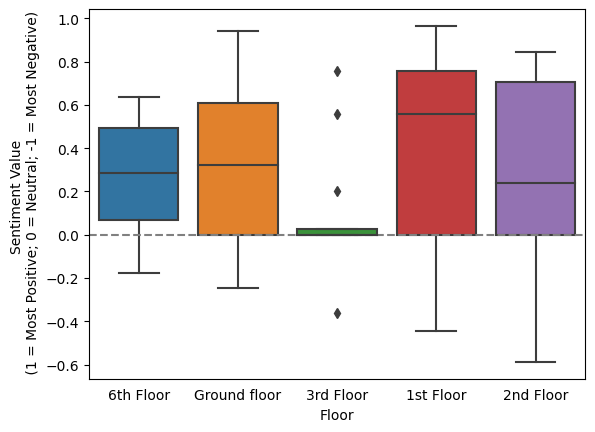

In [27]:
plot_sentiment_analysis(df, 'comfort')